In [1]:
#VaR Parametric Method (Gaussian Distribution)
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf

years = 15
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)

tickers = ['VOO']

adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=startDate, end=endDate)
    adj_close_df[ticker] = data['Adj Close']

log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns = log_returns.dropna()
log_returns

[*********************100%%**********************]  1 of 1 completed


,VOO
Date,
2010-09-10,0.004530
2010-09-13,0.012497
2010-09-14,-0.000194
2010-09-15,0.002520
2010-09-16,-0.000388
...,...
2024-02-13,-0.014195
2024-02-14,0.009471
2024-02-15,0.006742


In [2]:
from scipy.stats import norm
# Calculate mean and standard deviation of returns
mean = log_returns.iloc[:,0].mean()
std = log_returns.iloc[:,0].std()

# Set confidence level and time horizon
confidence_level = 0.95
time_horizon = 1  # in days

# Calculate VaR using the Parametric Method
z_score = norm.ppf(1 - confidence_level)
var_parametric = mean + z_score * std* np.sqrt(time_horizon)

# Print or display the result
print(f"Parametric VaR ({confidence_level * 100:.2f}% confidence) for {time_horizon}-day horizon: {var_parametric * 100:.4f}%")

Parametric VaR (95.00% confidence) for 1-day horizon: -1.7425%


(-0.05, 0.05)

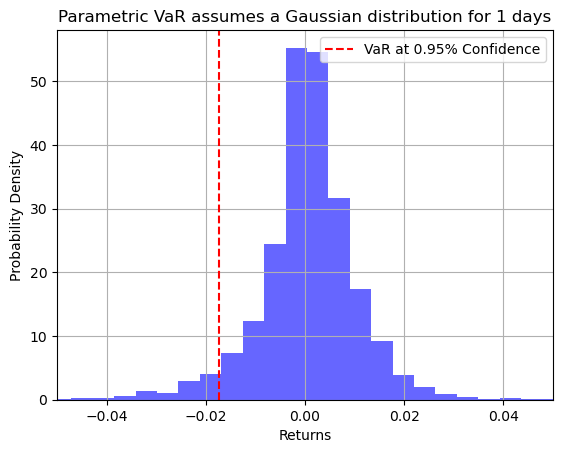

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

log_returns.iloc[:,0].hist(bins=50, density=True ,color='blue', alpha=0.6)

plt.xlabel('Returns')
plt.ylabel('Probability Density')
plt.axvline(x=var_parametric, linestyle='--', color='r', label= f'VaR at {confidence_level}% Confidence')
plt.title(f'Parametric VaR assumes a Gaussian distribution for {time_horizon} days')
plt.legend()
plt.xlim(-0.05, 0.05)